In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size='6' color='red'><b>ch03. 비지도학습 군집화</b></font>

# 1. 데이터생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140,195)

152

In [4]:
data = []
for i in range(50):
    # 여자 데이터 data 추가
    data.append([random.randint(40, 70), random.randint(140,170)])
    # 남자 데이터 data 추가
    data.append([random.randint(60, 95), random.randint(160,195)])
data

[[50, 151],
 [67, 163],
 [41, 168],
 [66, 193],
 [51, 169],
 [64, 173],
 [55, 163],
 [75, 187],
 [69, 151],
 [66, 168],
 [58, 151],
 [61, 177],
 [48, 141],
 [86, 187],
 [59, 161],
 [60, 161],
 [59, 163],
 [76, 182],
 [42, 158],
 [87, 171],
 [53, 151],
 [84, 188],
 [43, 170],
 [68, 188],
 [62, 157],
 [63, 180],
 [69, 155],
 [84, 181],
 [65, 167],
 [62, 164],
 [54, 140],
 [64, 161],
 [54, 149],
 [91, 187],
 [46, 170],
 [61, 161],
 [66, 143],
 [66, 163],
 [44, 161],
 [66, 194],
 [49, 159],
 [82, 160],
 [67, 168],
 [91, 188],
 [58, 163],
 [93, 180],
 [43, 162],
 [62, 183],
 [52, 148],
 [94, 175],
 [49, 166],
 [82, 186],
 [55, 167],
 [95, 165],
 [68, 167],
 [65, 194],
 [43, 156],
 [89, 176],
 [58, 163],
 [81, 175],
 [70, 164],
 [85, 166],
 [46, 156],
 [85, 177],
 [67, 170],
 [63, 191],
 [63, 160],
 [78, 164],
 [50, 168],
 [86, 174],
 [43, 166],
 [70, 178],
 [52, 158],
 [72, 179],
 [52, 144],
 [65, 164],
 [54, 169],
 [79, 179],
 [62, 166],
 [91, 187],
 [54, 158],
 [86, 181],
 [61, 147],
 [88

In [8]:
# 여자
print('여자 : ', [female for female in data[::2]])
print('남자 : ', [male for male in data[1::2]])
print('======================================')
print('여자 몸무게(x축) :', [female[0] for female in data[::2]])
print('여자 키(y축) :', [female[1] for female in data[::2]])
print('남자 몸무게(x축): ', [male[0] for male in data[1::2]])
print('남자 키(y축): ', [male[1] for male in data[1::2]])

여자 :  [[50, 151], [41, 168], [51, 169], [55, 163], [69, 151], [58, 151], [48, 141], [59, 161], [59, 163], [42, 158], [53, 151], [43, 170], [62, 157], [69, 155], [65, 167], [54, 140], [54, 149], [46, 170], [66, 143], [44, 161], [49, 159], [67, 168], [58, 163], [43, 162], [52, 148], [49, 166], [55, 167], [68, 167], [43, 156], [58, 163], [70, 164], [46, 156], [67, 170], [63, 160], [50, 168], [43, 166], [52, 158], [52, 144], [54, 169], [62, 166], [54, 158], [61, 147], [69, 168], [55, 141], [63, 156], [49, 164], [67, 157], [53, 163], [67, 165], [67, 161]]
남자 :  [[67, 163], [66, 193], [64, 173], [75, 187], [66, 168], [61, 177], [86, 187], [60, 161], [76, 182], [87, 171], [84, 188], [68, 188], [63, 180], [84, 181], [62, 164], [64, 161], [91, 187], [61, 161], [66, 163], [66, 194], [82, 160], [91, 188], [93, 180], [62, 183], [94, 175], [82, 186], [95, 165], [65, 194], [89, 176], [81, 175], [85, 166], [85, 177], [63, 191], [78, 164], [86, 174], [70, 178], [72, 179], [65, 164], [79, 179], [91, 18

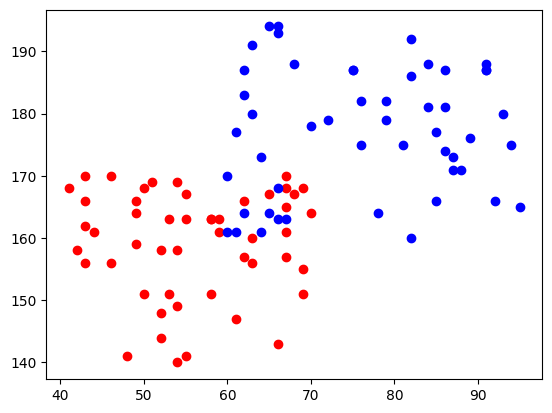

In [13]:
plt.plot([female[0] for female in data[::2]], [female[1] for female in data[::2]], 'ro')
plt.plot([male[0] for male in data[1::2]], [male[1] for male in data[1::2]], 'bo')
plt.show()

# 2. 군집화 로직

In [14]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[68, 169], [42, 179]]

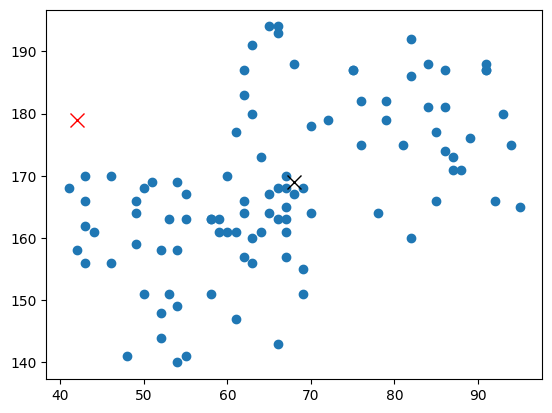

In [23]:
plt.plot([d[0] for d in data], [d[1] for d in data], 'o')
plt.plot(random_points[0][0], random_points[0][1], 'kx', markersize=10) # 기준점1(random_points[0])
plt.plot(random_points[1][0], random_points[1][1], 'rx', markersize=10) # 기준점2(random_points[1])

plt.show()

In [25]:
# 두 점 거리를 return / 파라미터: a : [0,0]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
dist([0,0], [3,4])

5.0

In [30]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(86, 14)

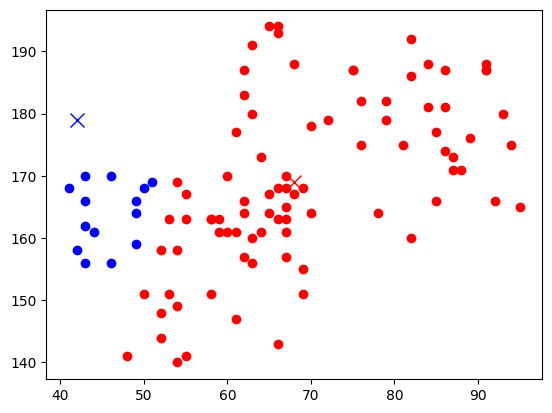

In [33]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'ro')
plt.plot(random_points[0][0], random_points[0][1], 'rx', markersize=10) # 기준점1(random_points[0])
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'bo')
plt.plot(random_points[1][0], random_points[1][1], 'bx', markersize=10) # 기준점2(random_points[1])


In [39]:
# 기준점 이동 : group0의 중심점(기준점0), gruop1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]
random_points[0]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[69.38372093023256, 168.8372093023256],
 [45.642857142857146, 163.78571428571428]]

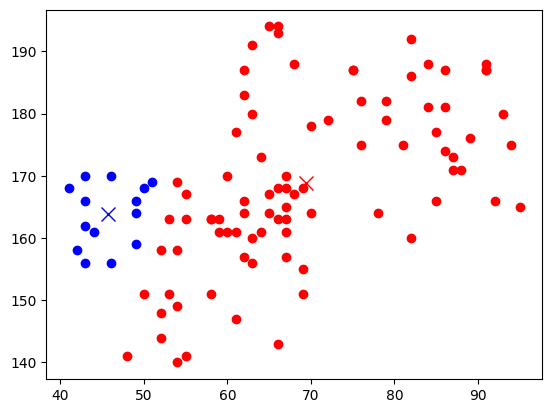

In [40]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'ro')
plt.plot(random_points[0][0], random_points[0][1], 'rx', markersize=10) # 기준점1(random_points[0])
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'bo')
plt.plot(random_points[1][0], random_points[1][1], 'bx', markersize=10) # 기준점2(random_points[1])

# 3. 군집합 전체 코드(for문 이용)
- 랜덤 포이트 2개 지정
- 랜덤 포인트 2개 시각화(x)
- for문
    - 랜덤포인트 2지점 기준으로 group0과 group1 나눔
    - group0의 중간점과 group1의 중간점을 포인트로 업데이트
    - 랜덤포인트 출려과 시각화

0 번째 points : [[41, 146], [69, 151]]
1 번째 points : [[48.21739130434783, 157.2173913043478], [71.3896103896104, 171.3896103896104]]
2 번째 points : [[52.43589743589744, 158.0], [74.77049180327869, 174.60655737704917]]
3 번째 points : [[55.18, 158.68], [76.94, 177.58]]
4 번째 points : [[56.0, 159.2037037037037], [77.8695652173913, 178.6086956521739]]
5 번째 points : [[56.64912280701754, 159.57894736842104], [78.53488372093024, 179.46511627906978]]
6 번째 points : [[56.94915254237288, 159.98305084745763], [79.17073170731707, 179.85365853658536]]
7 번째 points : [[57.21311475409836, 160.39344262295083], [79.8974358974359, 180.23076923076923]]
8 번째 points : [[57.21311475409836, 160.39344262295083], [79.8974358974359, 180.23076923076923]]
9 번째 points : [[57.21311475409836, 160.39344262295083], [79.8974358974359, 180.23076923076923]]
10 번째 points : [[57.21311475409836, 160.39344262295083], [79.8974358974359, 180.23076923076923]]
11 번째 points : [[57.21311475409836, 160.39344262295083], [79.8974358974359, 

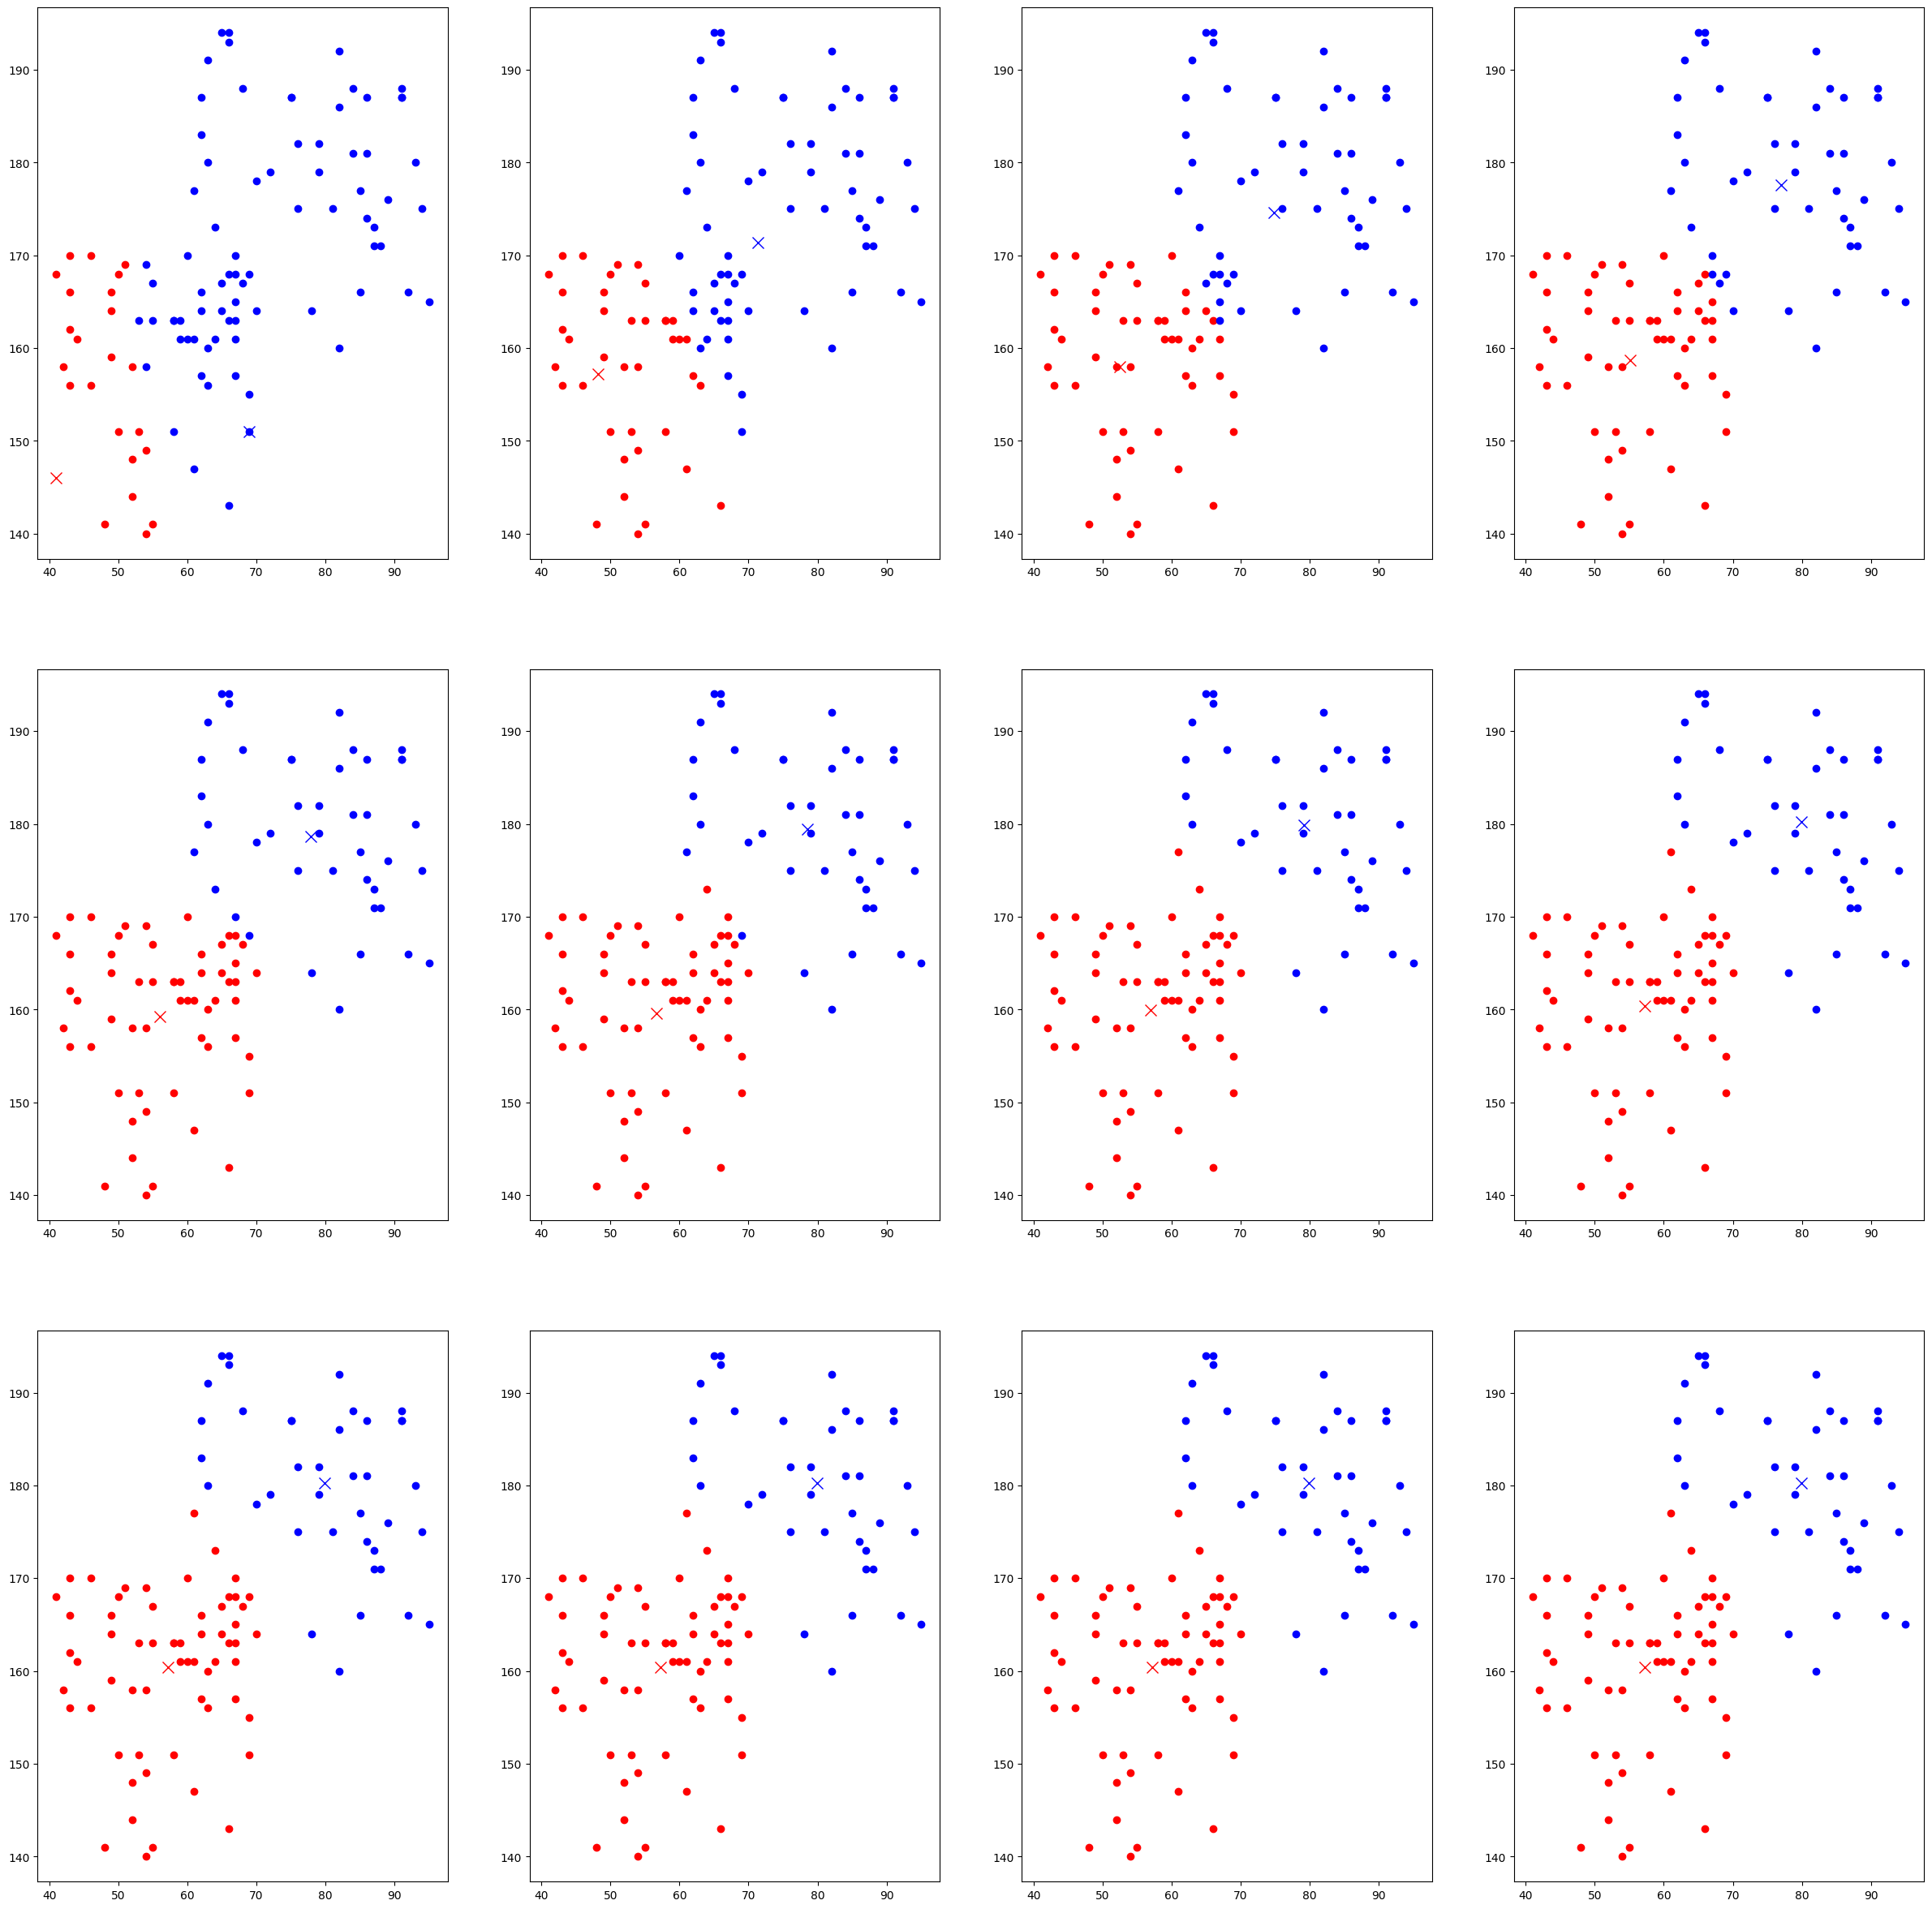

In [58]:
points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)],
]
f, ax = plt.subplots(3,4, figsize=(30,30))
for i in range(0,12):
    # points[0]에 가까운 그룹과 points[1]에 가까운 그룹을 분류
    group0 = []
    group1 = []
    for d in data:
        if dist(points[0], d) < dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    # 포인트 출력
    print(i, '번째 points :', points)
    ax[i//4, i%4].plot([d[0] for d in group0], [d[1] for d in group0], 'ro')
    ax[i//4, i%4].plot(points[0][0], points[0][1], 'rx', markersize=10)
    ax[i//4, i%4].plot([d[0] for d in group1], [d[1] for d in group1], 'bo')
    ax[i//4, i%4].plot(points[1][0], points[1][1], 'bx', markersize=10)
    # points 업데이트
    group0_meanX = np.mean([d[0] for d in group0])
    group0_meanY = np.mean([d[1] for d in group0])
    points[0] = [group0_meanX, group0_meanY]
    group1_meanX = np.mean([d[0] for d in group1])
    group1_meanY = np.mean([d[1] for d in group1])
    points[1] = [group1_meanX, group1_meanY]
    

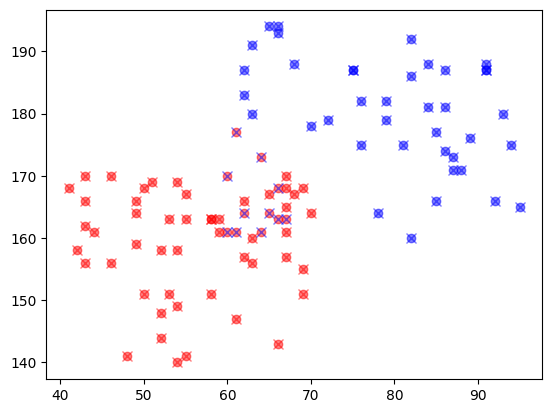

In [63]:
plt.plot([d[0] for d in group0],[d[1] for d in group0], 'ro', alpha=0.5)
plt.plot([d[0] for d in group1],[d[1] for d in group1], 'bo', alpha=0.5)
plt.plot([female[0] for female in data[::2]], [female[1] for female in data[::2]], 'rx', alpha=0.5, markersize=7)
plt.plot([male[0] for male in data[1::2]], [male[1] for male in data[1::2]], 'bx', alpha=0.5, markersize=7)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    - 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측)
    - 변환모델 : 전처리시 사용 ex. 인코딩, 스케일조정 - fit(학습), transform(변환함수)

In [70]:
# 군집분석 라이브러리가 경고 메세지를 출려할 경우 높은 확률로 multi-thread의 문제일것이다
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [71]:
from sklearn.cluster import KMeans
data = np.array(data)
model =KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random 하게
              n_init=10, # 10번 실행
              random_state=7) # random 결과를 일관적하게 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [72]:
# 기준점 중심점
model.cluster_centers_

array([[ 79.8974359 , 180.23076923],
       [ 57.21311475, 160.39344262]])

In [73]:
#나눠진 그룹 인덱스
model.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [75]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

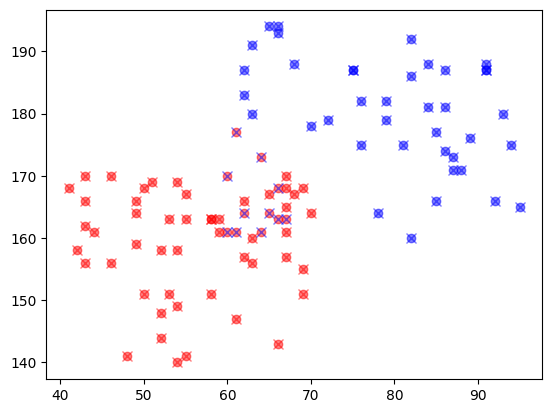

In [78]:
plt.plot([d[0] for d in group0],[d[1] for d in group0], 'bo', alpha=0.5)
plt.plot([d[0] for d in group1],[d[1] for d in group1], 'ro', alpha=0.5)
plt.plot([female[0] for female in data[::2]], [female[1] for female in data[::2]], 'rx', alpha=0.5, markersize=7)
plt.plot([male[0] for male in data[1::2]], [male[1] for male in data[1::2]], 'bx', alpha=0.5, markersize=7)